<a href="https://colab.research.google.com/github/VarnitaJoshi/DeepLearning_Pytorch/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PyTorch Workflow
to_cover={1:"data (prepare and load)",
          2:"build model",
          3: "fitting the model to data(training)",
          4: "making predictions and evaluating a model(inference)",
          5: "saving and loading a model",
          6: "putting it all together"}
to_cover


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__




'2.0.0+cu118'

##1.Data(preparing and loading)

## Data can be anything ...in ML.
* Excel sheet
* Images
* Videos
* Audio
* Text

Two parts of Ml
1. get data into numerical rep.
2. build a model to learn patterns in that numerial rep.

To show this, create some *known* data using the linear regression formula.
'y=a+bx'
use a linear regression formula to make a straight line with *known* **parameters**.
**Parameters** is something that a model learns.






In [ ]:
# Create *known* parameters DATASET CREATION 
weight=0.7 #can set these to any numbers.
bias=0.3
# Have to build a model that want to estimate these numbers
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # unsqueeze adds extra dimensions.
y=weight * X+bias

X[:10],y[:10] 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)
# idea of ML is to learn the representation of the input and how it maps to the output.
 

(50, 50)

###Splitting data into training and test sets.
create training and test set with our data.

In [ ]:
#Create a train/test split
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test, y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

To better visualise the data use matplotlib.

In [ ]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,
                     test_labels=y_test,predictions=None):
  
    """Plots training data, test data and compares predictions"""
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data,train_labels,c="b", s=4, label="Training Data")


    #plot test data in green
    plt.scatter(test_data, test_labels,c="g",s=4,label="Testing data")

    # Are there predictions?
    if predictions is not None:
      #Plot the predictions if they exist
      plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    # Show the legend it shows the labels on the matplotlib.
    plt.legend(prop={"size":14});







    

###perfect model would have red dots over the green dots

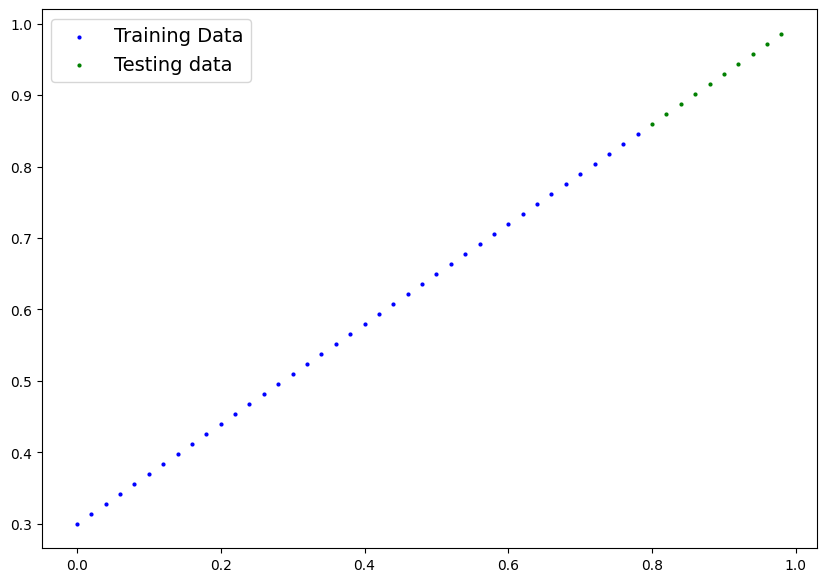

In [ ]:
plot_predictions();

### 2. Building model
We will create a linear regression model.

classes in python-https://www.w3schools.com/python/python_classes.asp
polymophism in python-https://www.w3schools.com/python/python_polymorphism.asp

-> in Python used for annotation (retrn type of the function.
https://pencilprogrammer.com/python-arrow-annotation/

## Goal of our model is to start with random numbers(weights and bias) and analyse the data then according to that update the random
## numbers to represent the pattern in the data or to approximate the known parameters(known weights and bias from which dataset is generated) as good as possible, it will do this with help of an algorithm called gradient descent.

It uses two algorithms to do this:

1. Gradient Descent-3blue 1 brown video
2. Backpropagation-3 blue 1 brown video


In [ ]:
import torch
from torch import nn
# create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,#<-start with a random weight and try to adjust it to the ideal weight
                                          requires_grad=True, # <- can this parameter be updated via gradient descent?
                                          dtype=torch.float)) # <- PyTorch datatype torch.float32
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  #Forward method to define computation in the model. here forward method is linear regression function.
  def forward(self, x:torch.Tensor)->torch.Tensor:#<- x is input data
    return self.weights * x+ self.bias #this is the linear regression formula
  # to update yhe values of weights and bias it uses radient descent and backpropagation



    
     

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

##PyTorch Model Building essentials.

* **torch.nn** - contains all of the buildings for comptational graphs(another word for neural network)

* **torch.nn.Parameter**- what parameters our model should try and learn, often a PyTorch layer from torch.nn will set these for us. 
* **torch.nn.Module** -  Base class for all neural network modules, if ou subclass it, you should overwrite forward()
* **torch.optim** - this where the optimizers in PyTorch live, they will help with gradient descent.
* **def forward()**- all nn.module subclasses require to overwrite forward(),this method defines what happens in the forward computation.

pytorch cheatsheet--https://pytorch.org/tutorials/beginner/ptcheat.html


###Checking the contents of our PyTorch Model
check model Parameters using '.parameters()'.




In [ ]:
# Create a Random seed
from torch.nn.modules.container import ParameterList
torch.manual_seed(42) # if you don't apply seed, can get different values at different times.
#create an instance of the model(this is a subclass of nn.Module)

model_0 =LinearRegressionModel()

# check parameters
list(model_0.parameters())




[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

##Making predictions using 'torch.inference_mode
To check model's predictive power, see hoe it predicts ' y-test '  based on X_test.

When data passes through model, it will run it through forward pass.











In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#Make predictions with model.
### inference mode turns OFF the gradient tracking, during inference not doing training so no need to keep track of gradient.
with torch.inference_mode():
  y_preds=model_0(X_test)

# similar with torch.nograd
# with torch.no_grad():
#   y_preds=model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

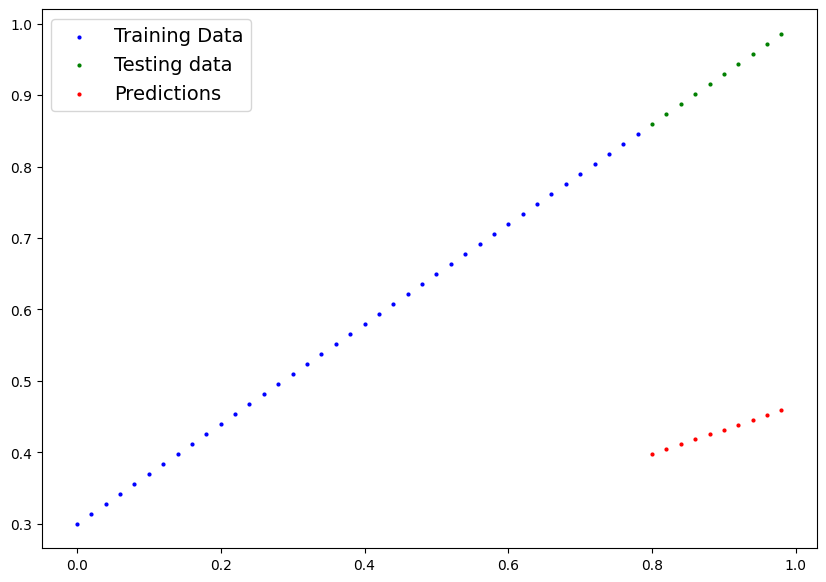

In [ ]:
plot_predictions(predictions=y_preds)

 ##3. Train model
The idea of training is to move from some *unknown* to approximate *known* parameters.
we use a loss function to measure the performance(how wrong the models predictions are) of the model's prediction.


NOTE: Loss function may also be called cost function or criteria in different areas.

Things we need to train:

**Loss function**- A function to measure how wrong models predictions are to the ideal outputs, lower the bettter.

**Optimizer**- Takes into account the loss of a model and adjusts the model's parameters(weight and bias),to improve the loss function.

And for PTorch,we need:
* A Training loop
* A testing loop











In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check model's parameters (a parameter is a value(and a testing loop that model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Set up a loss function
loss_fn=nn.L1Loss() # aim is to minimize the mean absolute error


# Set up an optimizer(stochastic gradient descent) if increasing weight reduces loss it keeps increasing weights till it stops effecting the loss
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr=learning rate=possibly the most important hyperparameter you choose yourself



In [ ]:
# smaller learning rate smaller change in the parameter.
loss_fn

L1Loss()

## Building a training loop in (and a testing loop) in PyTorch.

Things for a Training Loop:
0. Loop through the data and do..
1. Forward pass(involves data moving through our model's 'forward()' functions) to make predictions on data.

2. Calculate the loss(compare forward pass predictions to ground truth labels)

3. Optimize zero gradient

4. Loss backward-move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.
(** backpropagation **)

5. Optimizer step- use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)



 



In [ ]:
# with torch.no_grad():
#   list(model_0.parameters())

In [ ]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#An epoch is ne loop through the data...(this is a hyperparameter) pass data through the model for a number of epochs
torch.manual_seed(42)
epochs=200 # right now we have very less data

#Track different values
epoch_count= []
train_loss_values=[]
test_loss_values=[]



###Training
#0. Loop through the data
for epoch in range(epochs):
     #set model in training mode
     model_0.train() # train mode in PyTorch sets all parameters that require gradients to require  gradients

     # 1. Forward pass
     y_pred = model_0(X_train)
     #2. Loss calculation
     loss=loss_fn(y_pred, y_train)
    #  print(f"Loss:{loss}")
     #3.Optimizer zero grad
     optimizer.zero_grad()

     #4. Perform backpropagation on the loss with respect to the parameters of the model
     loss.backward()
     
     #5. Step the optimizer(perform gradient descent)
     optimizer.step() # by default how the optimizer changes will accuumulate through the loop so...we have to zero them above in step 3 
                        #for next loop iteration.Pytorch creates a curve for rvery Parameter in our model.
     #optimizer.step updates the model parameters.
      



     #Testing
     model_0.eval() # turns off different settings not necessary for evaluation.(dropout/batch norm layers)
     with torch.inference_mode(): # turns off off gradient tracking and some more things.
     #with torch.no_grad():
      #1. forward pass
      test_pred=model_0(X_test)

      #2. Loss
      test_loss=loss_fn(test_pred,y_test)
     
      if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)


        print(f"Epoch: {epoch} , Loss: {loss}, Test Loss:{test_loss}")
     #print model state dict
    #  print(model_0.state_dict())






Epoch: 0 , Loss: 0.31288138031959534, Test Loss:0.48106518387794495
Epoch: 10 , Loss: 0.1976713240146637, Test Loss:0.3463551998138428
Epoch: 20 , Loss: 0.08908725529909134, Test Loss:0.21729660034179688
Epoch: 30 , Loss: 0.053148526698350906, Test Loss:0.14464017748832703
Epoch: 40 , Loss: 0.04543796554207802, Test Loss:0.11360953003168106
Epoch: 50 , Loss: 0.04167863354086876, Test Loss:0.09919948130846024
Epoch: 60 , Loss: 0.03818932920694351, Test Loss:0.08886633068323135
Epoch: 70 , Loss: 0.03476089984178543, Test Loss:0.0805937647819519
Epoch: 80 , Loss: 0.03132382780313492, Test Loss:0.07232122868299484
Epoch: 90 , Loss: 0.02788739837706089, Test Loss:0.06473556160926819
Epoch: 100 , Loss: 0.024458957836031914, Test Loss:0.05646304413676262
Epoch: 110 , Loss: 0.021020207554101944, Test Loss:0.04819049686193466
Epoch: 120 , Loss: 0.01758546568453312, Test Loss:0.04060482233762741
Epoch: 130 , Loss: 0.014155393466353416, Test Loss:0.03233227878808975
Epoch: 140 , Loss: 0.010716589

In [ ]:
epoch_count, train_loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

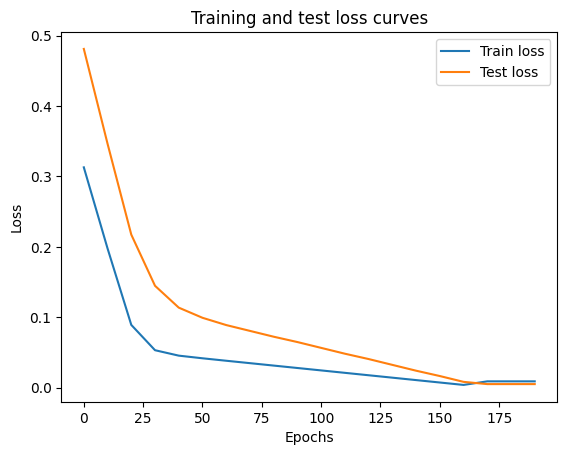

In [ ]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).cpu().numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();



In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

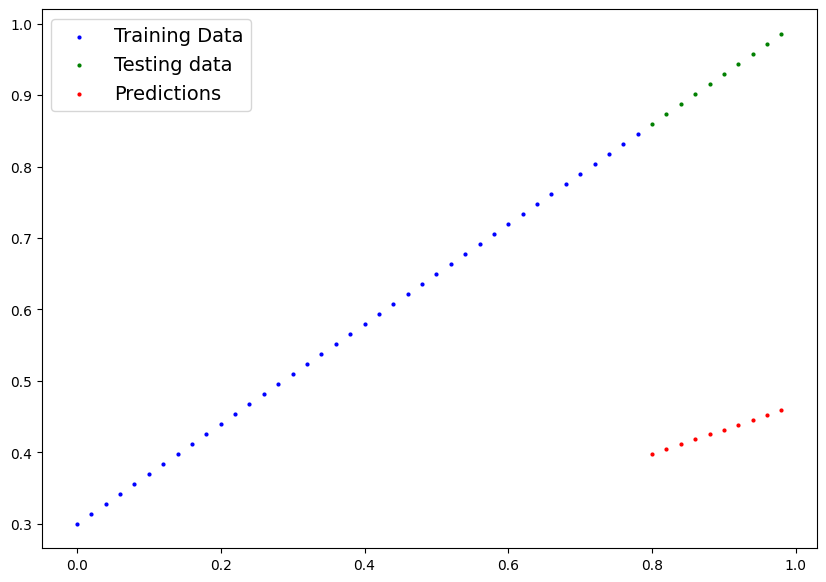

In [ ]:
plot_predictions(predictions=y_preds);

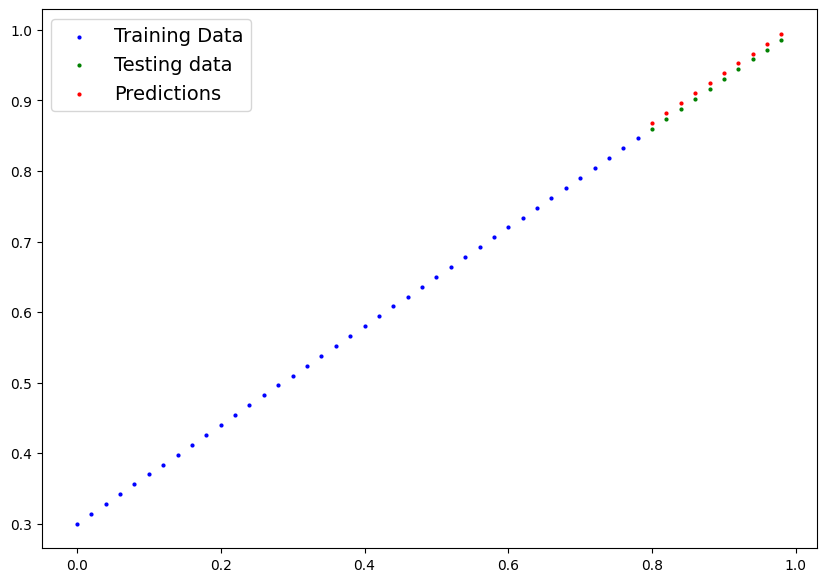

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving model in PyTorch
The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

    We'll create a directory for saving models to called models using Python's pathlib module.
    We'll create a file path to save the model to.
    We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.

    Note: It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from google.colab import drive
drive.mount('/content/googledrivedata') 

Mounted at /content/googledrivedata


In [ ]:
# saving model
from pathlib import Path
# 1 create directory
Model_Path=Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)


# 2 Create model save path
MODEL_NAME="01_PYTORCH_WORKFLOW_MODEL_0.pth"
MODEL_SAVE_PATH=Model_Path / MODEL_NAME
MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)



Saving model to: models/01_PYTORCH_WORKFLOW_MODEL_0.pth


##Putting it all altogether

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#pytorch version
torch.__version__

'2.0.0+cu118'

In [8]:
device= "cuda"  if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cpu


In [13]:
#Data creation
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight *X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [28]:
#split data
train_split= int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
X_train[:10],y_train[:10], len(X_train),len(y_train),len(X_test),len(y_test)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 40,
 40,
 10,
 10)

In [31]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test,predictions=None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    if predictions is not None:
      plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    plt.legend(prop={"size" : 14});

   
    

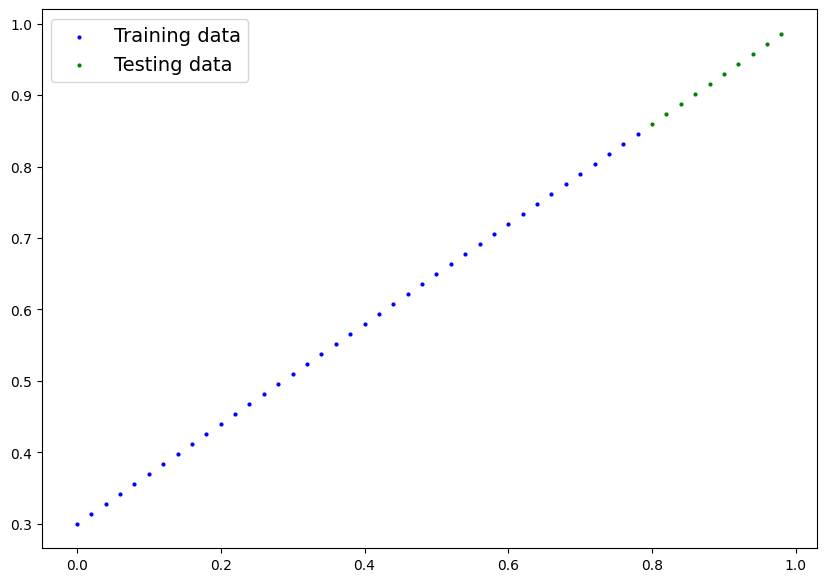

In [33]:
plot_predictions();

In [39]:
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self, x:torch.tensor) ->torch.tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1,model_1.state_dict()




(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
next(model_1.parameters()).device


device(type='cpu')

In [60]:
model_1=model_1.to(device)

In [61]:
model_1.state_dict(),next(model_1.parameters()).device


(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 device(type='cpu'))

In [45]:
loss_fxn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)



In [65]:
X_train=X_train.to(device)
y_train = y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

In [46]:
torch.manual_seed(42)
epochs=200

for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  loss=loss_fxn(y_pred,y_train)
  optimizer.zero_grad()
  
  loss.backward()
  optimizer.step()
  
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fxn(test_pred,y_test)

  if epoch % 10==0:
    print(f"Epoch:{epoch} | Loss: {loss} | Testloss : {test_loss}")
  
  

Epoch:0 | Loss: 0.5551779866218567 | Testloss : 0.5739762187004089
Epoch:10 | Loss: 0.4399680495262146 | Testloss : 0.4392663538455963
Epoch:20 | Loss: 0.3247582018375397 | Testloss : 0.30455657839775085
Epoch:30 | Loss: 0.20954827964305878 | Testloss : 0.16984674334526062
Epoch:40 | Loss: 0.09433844685554504 | Testloss : 0.03513689711689949
Epoch:50 | Loss: 0.023886386305093765 | Testloss : 0.04784906655550003
Epoch:60 | Loss: 0.0199567973613739 | Testloss : 0.04580312222242355
Epoch:70 | Loss: 0.016517987474799156 | Testloss : 0.0375305712223053
Epoch:80 | Loss: 0.013089170679450035 | Testloss : 0.029944902285933495
Epoch:90 | Loss: 0.009653178043663502 | Testloss : 0.02167237363755703
Epoch:100 | Loss: 0.006215679459273815 | Testloss : 0.014086711220443249
Epoch:110 | Loss: 0.002787243574857712 | Testloss : 0.005814164876937866
Epoch:120 | Loss: 0.0012645035749301314 | Testloss : 0.013801807537674904
Epoch:130 | Loss: 0.0012645035749301314 | Testloss : 0.013801807537674904
Epoch:140

In [66]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [67]:
weight,bias

(0.7, 0.3)

In [71]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

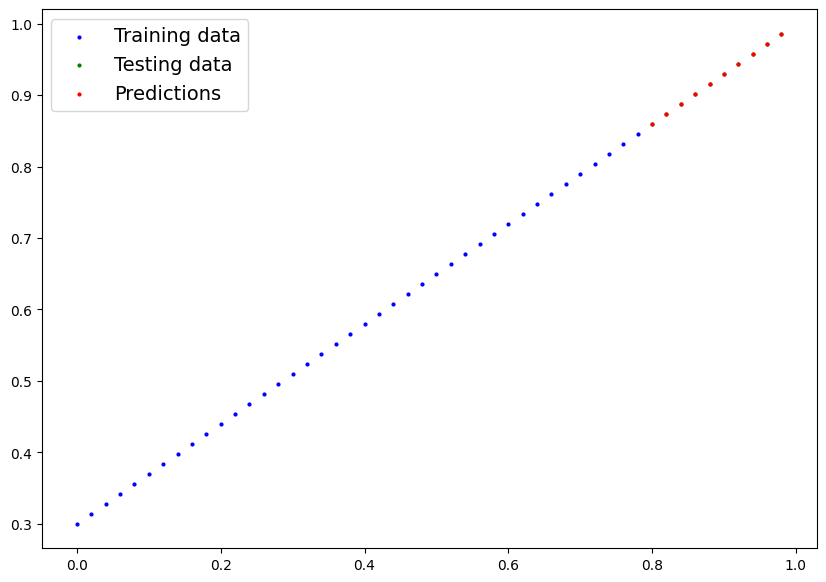

In [75]:
plot_predictions(predictions=y_preds.cpu()) #uses numpy array as argument matplotlib works with numpy



In [76]:
model_1.state_dict

<bound method Module.state_dict of LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>

In [84]:
from pathlib import Path

Model_path=Path("Models")
Model_path.mkdir(parents=True,exist_ok=True)

Model_Name="01_Pytorch_Model-2"
Model_save_path=Model_path/Model_Name

print(f"Saving Model to: {Model_save_path}")

torch.save(obj=model_1.state_dict(),f=Model_save_path)






Saving Model to: Models/01_Pytorch_Model-2


In [91]:
from google.colab import drive
drive.mount('/content/googledrivedata')
torch.save(obj=model_1.state_dict(),f="/content/googledrivedata/MyDrive/ColabNotebooks/Py_Model_01")


Drive already mounted at /content/googledrivedata; to attempt to forcibly remount, call drive.mount("/content/googledrivedata", force_remount=True).


In [94]:
loaded_model_1=LinearRegressionModelv2()
loaded_model_1.load_state_dict(torch.load(Model_save_path))
loaded_model_1.load_state_dict(torch.load("/content/googledrivedata/MyDrive/ColabNotebooks/Py_Model_01"))

<All keys matched successfully>

In [102]:
loaded_model_1.to(device)


LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [103]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [104]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [106]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_1(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])